In [10]:
from pathlib import Path
import csv
import json



def to_csv(file_path: Path) -> None:
    print(f'>>>>>>>> DIR: {file_path}')
    with open(file_path) as j_file:
        experiment: dict = json.load(j_file)
        experiment_name: str = experiment.get('config_name')
        train_history: list = experiment.get('train_history')
        if train_history is not None:
           csv_file_path = f'{file_path.parent}/{experiment_name}.csv'
           with open(csv_file_path, 'w', newline='') as csv_file:
                wr = csv.writer(csv_file, quoting=csv.QUOTE_ALL)
                wr.writerow(['epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'train_time'])
                for i, epoch in enumerate(train_history):
                    train_acc = epoch['train']['acc']
                    train_loss = epoch['train']['loss']
                    val_acc = epoch['val']['acc']
                    val_loss = epoch['val']['loss']
                    time = epoch['time']
                    wr.writerow([i + 1, train_loss, train_acc, val_loss, val_acc, time])
               


for path in list(Path('../log/definitive').rglob('*.json')):
    to_csv(path)
    

>>>>>>>> DIR: ../log/definitive/pure_liquid/no_dt_500seq_100lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/no_dt_500seq_200lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/250seq_200lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/250seq_200lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/500seq_400lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/250seq_100lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/250seq_400lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/500seq_200lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/250seq_100lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/no_dt_250seq_200lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/500seq_200lu_22ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/no_dt_250seq_100lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/500seq_100lu_11ch.json
>>>>>>>> DIR: ../log/definitive/pure_liquid/no_dt_500seq_200lu_11ch.json
>>>>>>>> DIR: ../log/definitive/

FILE: history_jandenawer01_1705539693.202662.json


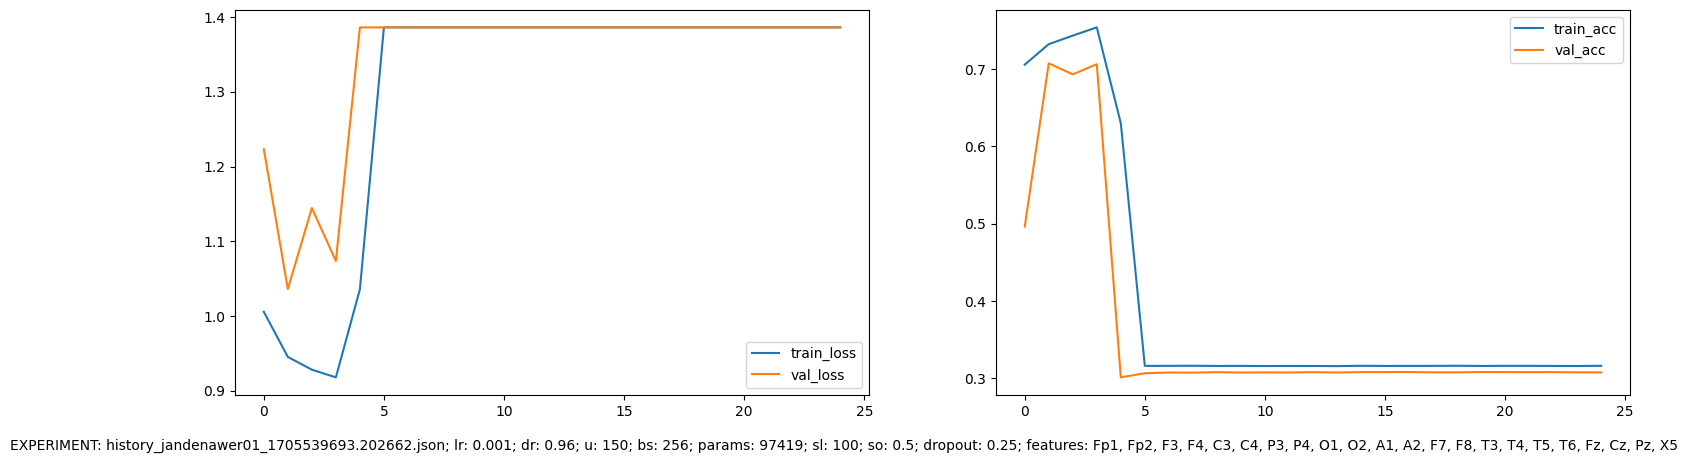

In [1]:
import json
import matplotlib.pyplot as plt
import os

from model import ModelType

LOGS_PATH = '../log/definitive'

def plot_results(train_log: dict, name: str):
    epoch_data = train_log.get('train_history', [])

    val_loss = []
    val_acc = []
    train_loss = []
    train_acc = []

    for epoch_log in epoch_data:
        val_loss.append(epoch_log['val']['loss'])
        val_acc.append(epoch_log['val']['acc'])
        train_loss.append(epoch_log['train']['loss'])
        train_acc.append(epoch_log['train']['acc'])

    num_epochs = range(len(epoch_data))

    u = train_log.get('liquid_units')
    params = train_log.get('num_params')
    sl = train_log.get('sequence_length')
    channels = train_log.get('features')
    dt = train_log.get('dt')
    num_channels = len(channels) if channels is not None else 22
    model_label = ModelType.label(train_log.get('model_type'))

    title = f'EXPERIMENT: {name}; model: {model_label}; params: {params}; liquid: {u}; window length: {sl}; channels: {num_channels}; dt: {dt}'

    plt.figure(figsize=(18, 5))
    plt.figtext(0, 0, title)
    plt.subplot(121)
    plt.plot(num_epochs, train_loss, label='train_loss')
    plt.plot(num_epochs, val_loss, label='val_loss')
    plt.legend()
    plt.subplot(122)
    plt.plot(num_epochs, train_acc, label='train_acc')
    plt.plot(num_epochs, val_acc, label='val_acc')
    plt.legend()


for file in sorted(os.listdir(LOGS_PATH)):
    if file.endswith('.json'):
        log_file_path: str = os.path.join(LOGS_PATH, file)
        with open(log_file_path) as f:
            train_log = json.load(f)
            print(f'FILE: {file}')
            plot_results(train_log, file)